## 2: Caluculating Loss

The company wants to check what percentage of loans have been a loss to the company:
Loans marked as Charged Off in the loan_status column represent a loss to the company.

- Calculate the percentage of charged off loans historically and the total amount that was paid towards these loans before being charged off.

In [1]:
import pandas as pd
import sys
sys.path.append('../')
from modules.data_transform import DataTransform
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('../csv_files/imputed_loan_payments.csv')

In [3]:
transformer = DataTransform()
df = transformer.encode_transform(df)
df = transformer.transform_digit_string(df)
df = transformer.cast_column_dtypes(df)

id --> int32
member_id --> int32
loan_amount --> int32
funded_amount --> float32
funded_amount_inv --> float32
term --> int32
int_rate --> float32
instalment --> float32
grade --> category
sub_grade --> category
employment_length --> int32
home_ownership --> category
annual_inc --> float32
verification_status --> category
issue_date --> date
loan_status --> category
payment_plan --> category
purpose --> category
dti --> float32
delinq_2yrs --> int32
earliest_credit_line --> date
inq_last_6mths --> int32
column not exist
column not exist
open_accounts --> int32
total_accounts --> int32
out_prncp --> float32
out_prncp_inv --> float32
total_payment --> float32
total_payment_inv --> float32
total_rec_prncp --> float32
total_rec_int --> float32
total_rec_late_fee --> float32
recoveries --> float32
collection_recovery_fee --> float32
last_payment_date --> date
last_payment_amount --> float32
column not exist
last_credit_pull_date --> date
collections_12_mths_ex_med --> int32
column not exist

In [4]:
# Q. Calculate the percentage of charged off loans historically
# Number of loans whose status is charged off
count_charged_off = len(df[df['loan_status'] == 'Charged Off'])
count_charged_off

5571

In [5]:
# Percentage of charged off loans from all loans (count)
count_all = len(df)
percentage_charged_off = (count_charged_off / count_all) * 100

In [6]:
# Plot charged off loans
percentage_charged_off_df = pd.DataFrame(data=[percentage_charged_off, 100 - percentage_charged_off], index=['charged off','not charged Off'])
percentage_charged_off_df

,0
charged off,10.272722
not charged Off,89.727278


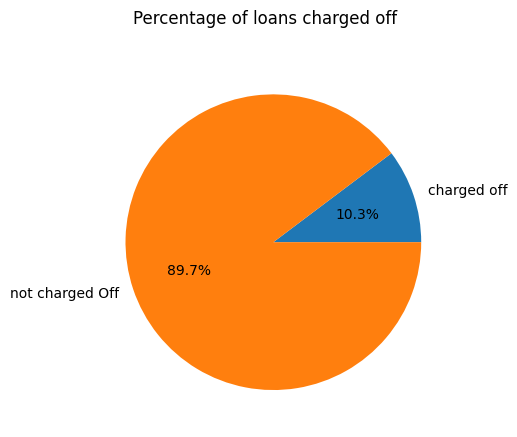

In [7]:
percentage_charged_off_df.plot(kind='pie',title='Percentage of loans charged off',legend=False,subplots=True, ylabel='',autopct='%1.1f%%')
plt.show()

In [8]:
# Q. Total amount that was paid towards these loans before being charged off
charged_off_df = df['total_payment_inv'][df['loan_status'] == 'Charged Off']
print(charged_off_df)
charged_off_paid_amount = sum(charged_off_df) 
print(charged_off_paid_amount)
# Compared with sum of payments of all loans
total_payment_made = sum(df['total_payment_inv'])
print(total_payment_made)

7        4134.919922
56       1906.510010
83        282.779999
90       1808.050049
117      1654.140015
            ...     
54152     136.399994
54156     666.849976
54180     688.349976
54194     668.869995
54198    2845.820068
Name: total_payment_inv, Length: 5571, dtype: float32
36152390.614751816
639326364.1111662


In [9]:
# Get percentage of sum of total payments from charged off loans 
percentage_payment_from_charged_off_loans = (charged_off_paid_amount / total_payment_made) * 100
print(percentage_payment_from_charged_off_loans)  

5.654762988698778


In [10]:
# Plot percentage of payment made by charged off loans
percentage_charged_off_df = pd.DataFrame(data=[percentage_payment_from_charged_off_loans, 100 - percentage_payment_from_charged_off_loans], index=['charged off','not charged Off'])
percentage_charged_off_df

,0
charged off,5.654763
not charged Off,94.345237


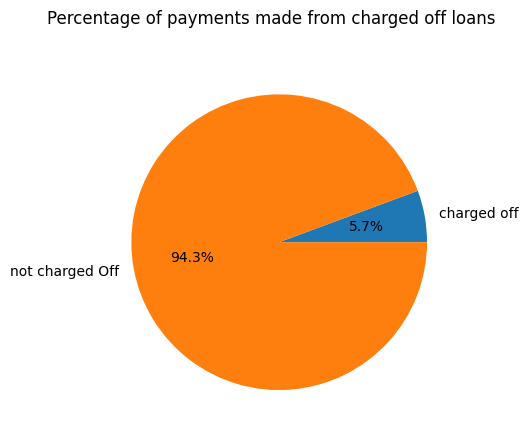

In [11]:
percentage_charged_off_df.plot(kind='pie',title='Percentage of payments made from charged off loans',legend=False,subplots=True, ylabel='',autopct='%1.1f%%')
plt.show()